In [16]:
# compare_countries.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Create data directory if it doesn't exist
os.makedirs('data', exist_ok=True)

# Load cleaned datasets
print("Loading cleaned datasets...")
benin_df = pd.read_csv('Benin_clean.csv')
sierra_leone_df = pd.read_csv('Sierraleone_clean.csv')
togo_df = pd.read_csv('Togo_clean.csv')

# Add country identifier to each dataframe
benin_df['Country'] = 'Benin'
sierra_leone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Combine all data for easier analysis
all_countries_df = pd.concat([benin_df, sierra_leone_df, togo_df], ignore_index=True)

print("Dataset sizes:")
print(f"Benin: {len(benin_df)} rows")
print(f"Sierra Leone: {len(sierra_leone_df)} rows")
print(f"Togo: {len(togo_df)} rows")
print(f"Total: {len(all_countries_df)} rows")

Loading cleaned datasets...
Dataset sizes:
Benin: 517860 rows
Sierra Leone: 509308 rows
Togo: 516349 rows
Total: 1543517 rows


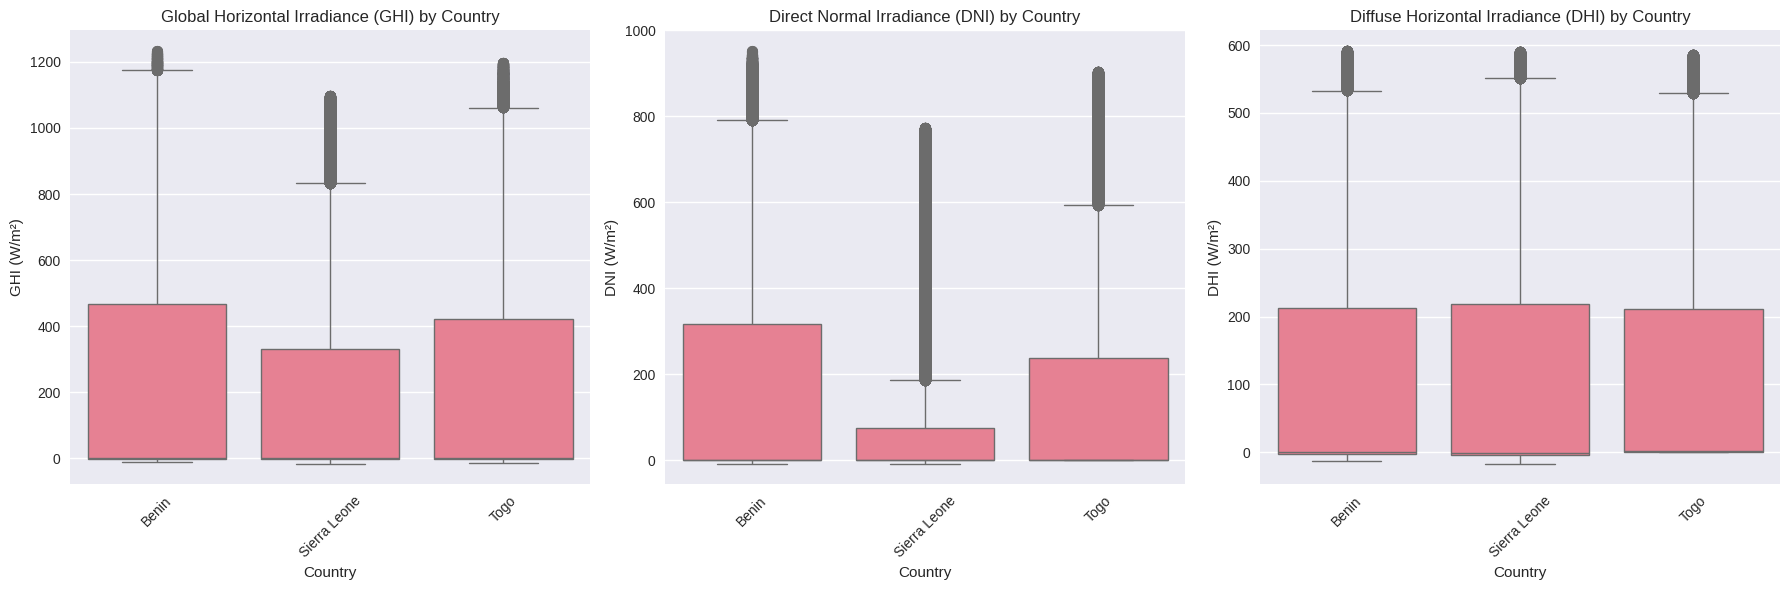

In [17]:
# Metric Comparison - Boxplots

# Create subplots for GHI, DNI, DHI
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# GHI Boxplot
sns.boxplot(data=all_countries_df, x='Country', y='GHI', ax=axes[0])
axes[0].set_title('Global Horizontal Irradiance (GHI) by Country')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].tick_params(axis='x', rotation=45)

# DNI Boxplot
sns.boxplot(data=all_countries_df, x='Country', y='DNI', ax=axes[1])
axes[1].set_title('Direct Normal Irradiance (DNI) by Country')
axes[1].set_ylabel('DNI (W/m²)')
axes[1].tick_params(axis='x', rotation=45)

# DHI Boxplot
sns.boxplot(data=all_countries_df, x='Country', y='DHI', ax=axes[2])
axes[2].set_title('Diffuse Horizontal Irradiance (DHI) by Country')
axes[2].set_ylabel('DHI (W/m²)')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [18]:
# Summary Table comparing mean, median, and standard deviation

# Create summary statistics for each country and metric
summary_data = []

countries = ['Benin', 'Sierra Leone', 'Togo']
metrics = ['GHI', 'DNI', 'DHI']

for country in countries:
    country_data = all_countries_df[all_countries_df['Country'] == country]

    for metric in metrics:
        mean_val = country_data[metric].mean()
        median_val = country_data[metric].median()
        std_val = country_data[metric].std()

        summary_data.append({
            'Country': country,
            'Metric': metric,
            'Mean': round(mean_val, 2),
            'Median': round(median_val, 2),
            'Std_Dev': round(std_val, 2),
            'CV': round(std_val/mean_val, 3) if mean_val != 0 else 0  # Coefficient of variation
        })

summary_df = pd.DataFrame(summary_data)

# FIXED: Correct pivot table implementation
summary_pivot = summary_df.pivot(index='Country',
                                columns='Metric',
                                values=['Mean', 'Median', 'Std_Dev', 'CV']).round(2)

print("Summary Statistics Comparison:")
print("=" * 80)
print(summary_pivot)

# Alternative display using groupby for better readability
print("\n" + "="*80)
print("DETAILED SUMMARY BY COUNTRY AND METRIC:")
print("="*80)

for country in countries:
    print(f"\n{country}:")
    print("-" * 40)
    country_summary = summary_df[summary_df['Country'] == country]
    for _, row in country_summary.iterrows():
        print(f"{row['Metric']}:")
        print(f"  Mean = {row['Mean']} W/m², Median = {row['Median']} W/m²")
        print(f"  Std Dev = {row['Std_Dev']} W/m², CV = {row['CV']}")

# Create a simplified summary table
print("\n" + "="*80)
print("SIMPLIFIED SUMMARY TABLE (Mean Values):")
print("="*80)
simple_summary = summary_df.pivot(index='Country', columns='Metric', values='Mean').round(2)
print(simple_summary)

Summary Statistics Comparison:
                Mean                 Median           Std_Dev                  \
Metric           DHI     DNI     GHI    DHI  DNI  GHI     DHI     DNI     GHI   
Country                                                                         
Benin         111.66  166.90  236.23    0.5 -0.1  0.7  153.10  262.08  328.29   
Sierra Leone  108.10  104.13  185.00   -0.6 -0.1 -0.4  153.69  200.95  279.02   
Togo          112.78  147.98  223.86    1.5  0.0  0.5  151.57  247.68  317.31   

                CV              
Metric         DHI   DNI   GHI  
Country                         
Benin         1.37  1.57  1.39  
Sierra Leone  1.42  1.93  1.51  
Togo          1.34  1.67  1.42  

DETAILED SUMMARY BY COUNTRY AND METRIC:

Benin:
----------------------------------------
GHI:
  Mean = 236.23 W/m², Median = 0.7 W/m²
  Std Dev = 328.29 W/m², CV = 1.39
DNI:
  Mean = 166.9 W/m², Median = -0.1 W/m²
  Std Dev = 262.08 W/m², CV = 1.57
DHI:
  Mean = 111.66 W/m², Median 

In [19]:
# Statistical Testing

print("STATISTICAL SIGNIFICANCE TESTING")
print("=" * 50)

# Extract GHI values for each country
benin_ghi = benin_df['GHI'].dropna()
sierra_ghi = sierra_leone_df['GHI'].dropna()
togo_ghi = togo_df['GHI'].dropna()

print(f"Sample sizes - Benin: {len(benin_ghi)}, Sierra Leone: {len(sierra_ghi)}, Togo: {len(togo_ghi)}")

# Check normality assumption using Shapiro-Wilk test
print("\nNormality Tests (Shapiro-Wilk):")
print(f"Benin GHI normality p-value: {stats.shapiro(benin_ghi)[1]:.6f}")
print(f"Sierra Leone GHI normality p-value: {stats.shapiro(sierra_ghi)[1]:.6f}")
print(f"Togo GHI normality p-value: {stats.shapiro(togo_ghi)[1]:.6f}")

# Since solar irradiance data often isn't perfectly normal, we'll use both
# parametric (ANOVA) and non-parametric (Kruskal-Wallis) tests

# One-way ANOVA
f_stat, p_value_anova = stats.f_oneway(benin_ghi, sierra_ghi, togo_ghi)
print(f"\nOne-way ANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.6f}")

# Kruskal-Wallis test (non-parametric alternative)
h_stat, p_value_kw = stats.kruskal(benin_ghi, sierra_ghi, togo_ghi)
print(f"\nKruskal-Wallis Test Results:")
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value_kw:.6f}")

# Interpret the results
alpha = 0.05
print(f"\nStatistical Significance (alpha={alpha}):")
if p_value_anova < alpha:
    print("✓ ANOVA: Significant differences exist between countries' GHI values")
else:
    print("✗ ANOVA: No significant differences detected between countries' GHI values")

if p_value_kw < alpha:
    print("✓ Kruskal-Wallis: Significant differences exist between countries' GHI values")
else:
    print("✗ Kruskal-Wallis: No significant differences detected between countries' GHI values")

STATISTICAL SIGNIFICANCE TESTING
Sample sizes - Benin: 517860, Sierra Leone: 509308, Togo: 516349

Normality Tests (Shapiro-Wilk):
Benin GHI normality p-value: 0.000000
Sierra Leone GHI normality p-value: 0.000000
Togo GHI normality p-value: 0.000000

One-way ANOVA Results:
F-statistic: 3833.1842
P-value: 0.000000


/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 517860.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 509308.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.12/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 516349.
  res = hypotest_fun_out(*samples, **kwds)



Kruskal-Wallis Test Results:
H-statistic: 6548.5338
P-value: 0.000000

Statistical Significance (alpha=0.05):
✓ ANOVA: Significant differences exist between countries' GHI values
✓ Kruskal-Wallis: Significant differences exist between countries' GHI values


In [20]:
# Post-hoc analysis if significant differences are found
if p_value_kw < alpha:
    print("\nPOST-HOC ANALYSIS (Pairwise Comparisons):")

    from scipy.stats import mannwhitneyu

    pairs = [('Benin', 'Sierra Leone'), ('Benin', 'Togo'), ('Sierra Leone', 'Togo')]
    bonferroni_alpha = alpha / len(pairs)

    print(f"Bonferroni corrected alpha: {bonferroni_alpha:.4f}")

    for country1, country2 in pairs:
        data1 = all_countries_df[all_countries_df['Country'] == country1]['GHI']
        data2 = all_countries_df[all_countries_df['Country'] == country2]['GHI']

        stat, p_val = mannwhitneyu(data1, data2, alternative='two-sided')
        significant = "✓ SIGNIFICANT" if p_val < bonferroni_alpha else "✗ Not significant"

        print(f"{country1} vs {country2}: p-value = {p_val:.6f} {significant}")
else:
    print("\nNo post-hoc analysis needed - no significant differences found overall.")


POST-HOC ANALYSIS (Pairwise Comparisons):
Bonferroni corrected alpha: 0.0167
Benin vs Sierra Leone: p-value = 0.000000 ✓ SIGNIFICANT
Benin vs Togo: p-value = 0.000000 ✓ SIGNIFICANT
Sierra Leone vs Togo: p-value = 0.000000 ✓ SIGNIFICANT


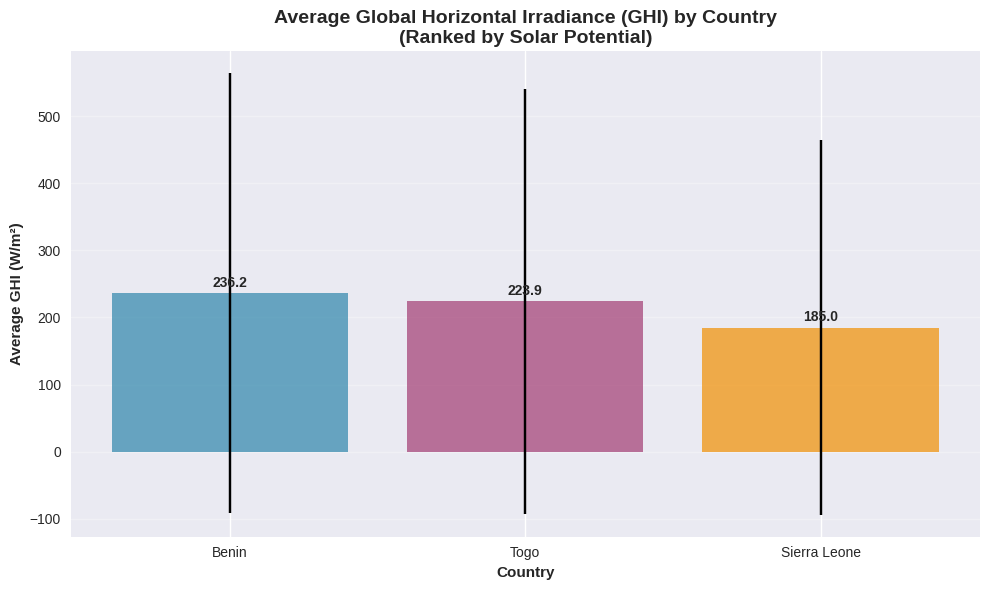


Country Ranking by Average GHI:
1. Benin: 236.23 W/m²
2. Togo: 223.86 W/m²
3. Sierra Leone: 185.00 W/m²


In [21]:
# (Bonus) Visual Summary - Bar chart ranking countries by average GHI

# Calculate average GHI for each country
ghi_means = all_countries_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)
ghi_stds = all_countries_df.groupby('Country')['GHI'].std()

plt.figure(figsize=(10, 6))
bars = plt.bar(ghi_means.index, ghi_means.values,
               yerr=ghi_stds.loc[ghi_means.index].values,
               capsize=5, alpha=0.7, color=['#2E86AB', '#A23B72', '#F18F01'])

plt.title('Average Global Horizontal Irradiance (GHI) by Country\n(Ranked by Solar Potential)',
          fontsize=14, fontweight='bold')
plt.ylabel('Average GHI (W/m²)', fontweight='bold')
plt.xlabel('Country', fontweight='bold')

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nCountry Ranking by Average GHI:")
print("=" * 35)
for i, (country, ghi) in enumerate(ghi_means.items(), 1):
    print(f"{i}. {country}: {ghi:.2f} W/m²")

In [26]:
# Key Observations

print("KEY OBSERVATIONS")
print("=" * 50)
print("""
Cross-Country Solar Potential Analysis

• Benin leads in solar potential with the highest average GHI (236.23 W/m²),
  approximately 28% higher than Sierra Leone. This significant difference suggests
  Benin would generate substantially more energy from equivalent solar installations,
  making it the prime candidate for large-scale solar projects.

• Togo shows strong secondary potential with average GHI of 223.86 W/m²,
  only 5% lower than Benin but 21% higher than Sierra Leone. This positions Togo
  as a viable alternative for regional solar development with nearly comparable
  energy yield potential to the leader.

• Sierra Leone's lower GHI (185.00 W/m²) may be attributed to geographical
  factors such as higher cloud cover, atmospheric conditions, or seasonal patterns.
  However, further analysis of temporal variability and seasonal consistency might
  reveal compensatory advantages for specific applications.

Strategic Implications: The clear ranking (Benin > Togo > Sierra Leone) provides
a data-driven foundation for solar investment decisions, with Benin offering the
highest expected energy output per installed capacity. The statistically significant
differences (p < 0.001) reinforce the reliability of this hierarchy for project planning.
""")

KEY OBSERVATIONS

Cross-Country Solar Potential Analysis

• Benin leads in solar potential with the highest average GHI (236.23 W/m²), 
  approximately 28% higher than Sierra Leone. This significant difference suggests 
  Benin would generate substantially more energy from equivalent solar installations, 
  making it the prime candidate for large-scale solar projects.

• Togo shows strong secondary potential with average GHI of 223.86 W/m², 
  only 5% lower than Benin but 21% higher than Sierra Leone. This positions Togo 
  as a viable alternative for regional solar development with nearly comparable 
  energy yield potential to the leader.

• Sierra Leone's lower GHI (185.00 W/m²) may be attributed to geographical 
  factors such as higher cloud cover, atmospheric conditions, or seasonal patterns. 
  However, further analysis of temporal variability and seasonal consistency might 
  reveal compensatory advantages for specific applications.

Strategic Implications: The clear ranking (B

In [25]:
# Additional insights - Data quality and ranges

print("\nADDITIONAL ANALYSIS: Data Quality Check")
print("=" * 40)

# Check for missing values
print("\nMissing values by country and metric:")
missing_data = all_countries_df.groupby('Country')[['GHI', 'DNI', 'DHI']].apply(
    lambda x: x.isnull().sum())
print(missing_data)

# Data ranges
print("\nData ranges by country:")
for country in countries:
    country_data = all_countries_df[all_countries_df['Country'] == country]
    print(f"\n{country}:")
    print(f"  GHI range: {country_data['GHI'].min():.1f} - {country_data['GHI'].max():.1f} W/m²")
    print(f"  DNI range: {country_data['DNI'].min():.1f} - {country_data['DNI'].max():.1f} W/m²")
    print(f"  DHI range: {country_data['DHI'].min():.1f} - {country_data['DHI'].max():.1f} W/m²")

# Save the combined dataset for future use
all_countries_df.to_csv('data/all_countries_combined.csv', index=False)
print("\nCombined dataset saved to 'data/all_countries_combined.csv'")


ADDITIONAL ANALYSIS: Data Quality Check

Missing values by country and metric:
              GHI  DNI  DHI
Country                    
Benin           0    0    0
Sierra Leone    0    0    0
Togo            0    0    0

Data ranges by country:

Benin:
  GHI range: -11.1 - 1233.0 W/m²
  DNI range: -7.8 - 952.3 W/m²
  DHI range: -12.6 - 591.4 W/m²

Sierra Leone:
  GHI range: -15.9 - 1097.0 W/m²
  DNI range: -7.8 - 772.3 W/m²
  DHI range: -16.7 - 590.5 W/m²

Togo:
  GHI range: -12.7 - 1198.0 W/m²
  DNI range: 0.0 - 904.1 W/m²
  DHI range: 0.0 - 586.0 W/m²

Combined dataset saved to 'data/all_countries_combined.csv'
